# Customer Segmentation using Unsupervised Learning

## Project Overview
This project applies unsupervised machine learning techniques to segment customers based on their demographic and purchasing behavior. The goal is to discover meaningful customer groups that can support business decisions such as targeted marketing and personalized offers.

## Objectives
- Explore and understand customer data
- Preprocess and scale features for clustering
- Apply K-Means clustering
- Visualize and interpret customer segments
- Evaluate clustering quality
- Derive business insights

## Tools & Libraries
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn
- SciPy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


## Dataset Description

The dataset contains customer information such as:
- Age
- Annual Income
- Spending Score

Each row represents a unique customer.  
This data will be used to identify customer segments based on similarity.


In [ ]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/unzipped_archive/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Exploratory Data Analysis (EDA)

EDA helps understand feature distributions, relationships, and potential outliers before clustering.


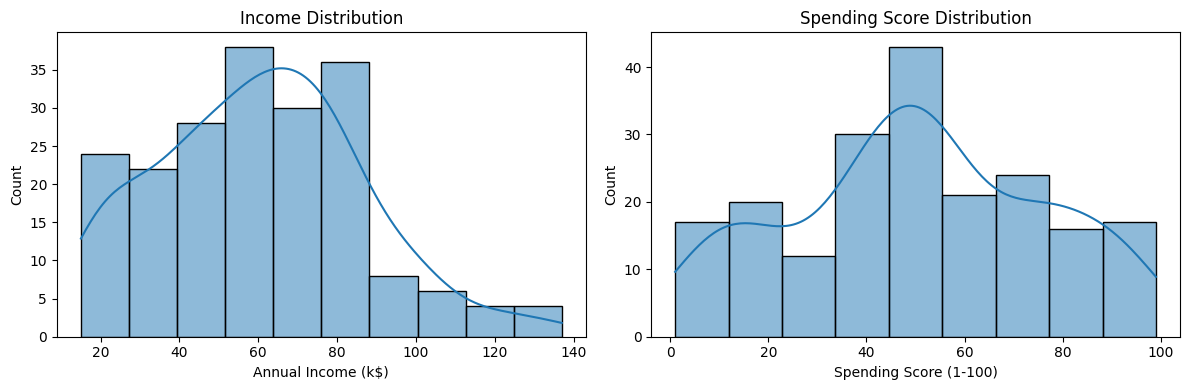

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Income Distribution")

plt.subplot(1,2,2)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.savefig("eda_distributions.png")  # SAVE IMAGE
plt.show()

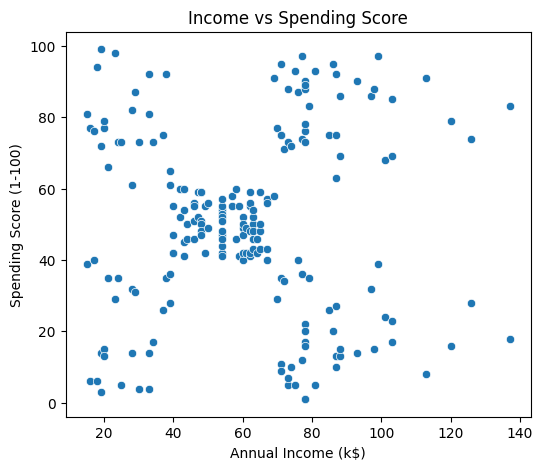

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")
plt.savefig("eda_scatter.png")
plt.show()

## Data Preprocessing

Before clustering, we:
- Remove irrelevant columns
- Select numeric features
- Scale data to ensure fair distance calculation


In [ ]:
# Drop ID column if it exists

if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Choosing Optimal Number of Clusters (Elbow Method)

The Elbow Method helps determine the optimal number of clusters by analyzing inertia (WCSS).


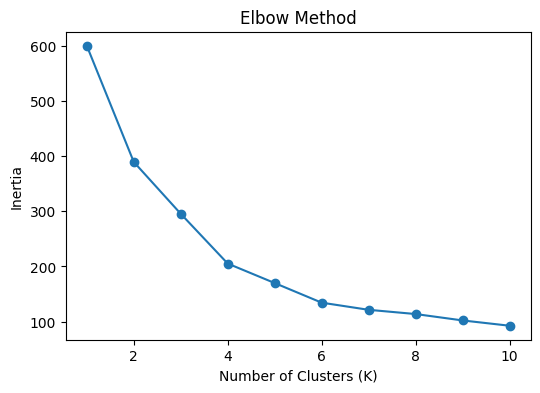

In [ ]:
inertia = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig("elbow_method.png")
plt.show()


## K-Means Clustering

Based on the Elbow Method, we apply K-Means with an optimal number of clusters.


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


## Cluster Visualization

Customers are visualized based on Income and Spending Score.


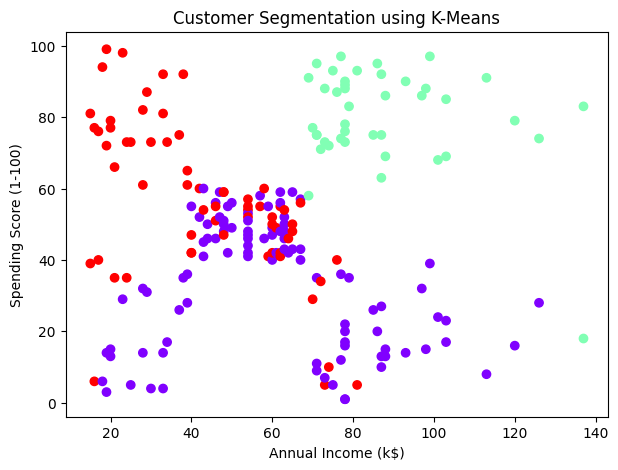

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.savefig("cluster_visualization.png")
plt.show()

## Cluster Analysis & Interpretation

We analyze the average characteristics of each cluster to understand customer behavior.


In [ ]:
df.groupby('Cluster').mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,50.406250,60.468750,33.343750
1,32.853659,87.341463,79.975610
2,25.142857,43.269841,56.507937


## Business Insights

- **Cluster 0:** Budget customers (low income, low spending)
- **Cluster 1:** Premium customers (high income, high spending)
- **Cluster 2:** Careful spenders (high income, low spending)

These insights can help businesses design targeted marketing strategies and improve customer engagement.


## Clustering Evaluation

Since clustering is unsupervised, we use the Silhouette Score to evaluate cluster quality.


In [ ]:
score = silhouette_score(X_scaled, df['Cluster'])
score


np.float64(0.3579234303882264)

## Conclusion

This project demonstrates how unsupervised learning can be used to uncover hidden patterns in customer data.  
K-Means clustering successfully segmented customers into meaningful groups, providing actionable insights for business decision-making.

This approach can be extended to other domains such as sales analysis, recommendation systems, and customer behavior modeling.
